In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits

%matplotlib inline

In [2]:
N=5
image = []
axis_integrated_image = []
for i in range(N):
    image.append(fits.open('./simulations/fits_files/i/'+str(i)+'.fits')[0].data)
    axis_integrated_image.append(np.sum(image[i], axis=0))

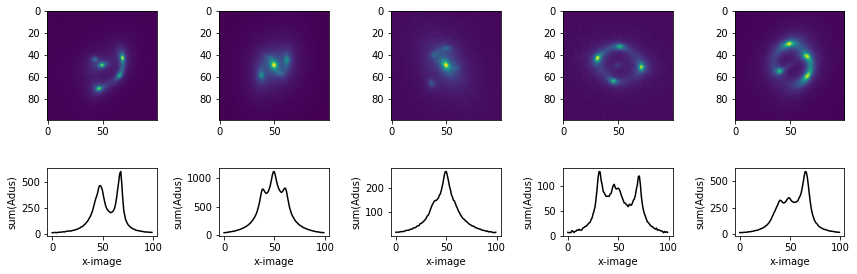

In [3]:

fig, ax = plt.subplots(2, N, figsize=(12, 4.5), gridspec_kw={'height_ratios': [3, 1]})
for i in range(0, len(image)):
    ax[0][i].imshow(image[i])
    ax[1][i].plot(axis_integrated_image[i], 'k')
    ax[1][i].set_xlabel('x-image')
    ax[1][i].set_ylabel('sum(Adus)')
plt.tight_layout();

In [4]:
pre_set_sigma = 3
x_grid=np.linspace(50-pre_set_sigma, 50+pre_set_sigma, 2*pre_set_sigma+1, dtype=int)

In [5]:
over_mean_int_image=axis_integrated_image[0][50-pre_set_sigma:50+pre_set_sigma+1]
over_mean_int_image=over_mean_int_image/np.max(over_mean_int_image)

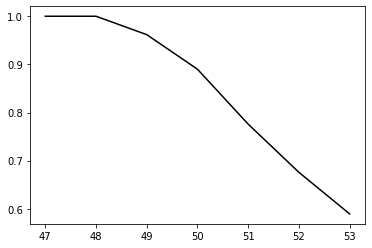

In [6]:
plt.plot(x_grid, over_mean_int_image, 'k')

In [7]:
from scipy.optimize import minimize

In [8]:
class find_radius:
    def __init__(self,x, y):
        self.x=x
        self.y=y
    
    def gauss_func(self, x_val, norm_val, x0_val, sigma_val):
        return norm_val*np.exp(-0.5*((x_val-x0_val)/sigma_val)**2)

    def chi_squared(self, par):
        norm, x0, sigma = par
        gauss_array = self.gauss_func(self.x, norm, x0, sigma)
        return np.sum((self.y-gauss_array)**2)

In [9]:
init_guess = [1., 50, 2]

In [10]:
finder=find_radius(x_grid, over_mean_int_image)

result=minimize(finder.chi_squared, init_guess, method='Nelder-Mead')

In [11]:
result=result.x

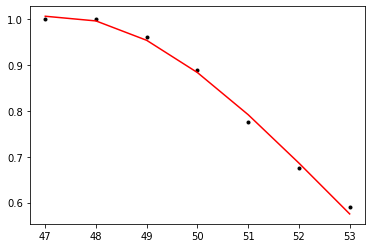

In [12]:
plt.plot(x_grid, over_mean_int_image, 'k.')
plt.plot(x_grid, finder.gauss_func(x_grid, result[0], result[1], result[2]), 'r')

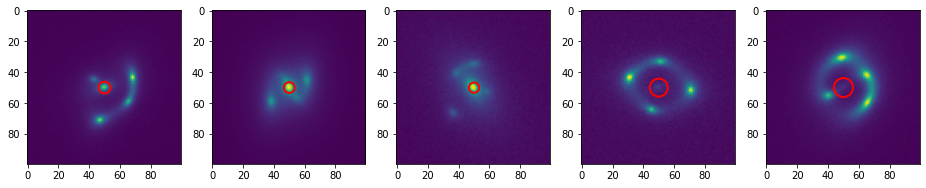

In [13]:
fig, ax = plt.subplots(1, N, figsize=(16, 7))
for i in range(N):
    over_mean_int_image=axis_integrated_image[i][50-pre_set_sigma:50+pre_set_sigma+1]
    over_mean_int_image=over_mean_int_image/np.max(over_mean_int_image)
    finder=find_radius(x_grid, over_mean_int_image)
    result=minimize(finder.chi_squared, init_guess, method='Nelder-Mead')
    result=result.x
    ax[i].imshow(image[i])
    circle = plt.Circle((50., 50.), result[2]*0.7, color='r', fill=False, lw=2)
    ax[i].add_patch(circle)
    
fig.savefig('./general_images/lens_image_finder.png', dpi=250)

In [14]:
class find_radius:
    def __init__(self, pre_set_sigma, image_array):
        axis_integrated_image = np.sum(image_array, axis=0)
        over_mean_int_image=axis_integrated_image[50-pre_set_sigma:50+pre_set_sigma+1]
        self.y=over_mean_int_image/np.max(over_mean_int_image)
        self.x=np.linspace(50-pre_set_sigma, 50+pre_set_sigma, 2*pre_set_sigma+1, dtype=int)
    
    def gauss_func(self, x_val, norm_val, x0_val, sigma_val):
        return norm_val*np.exp(-0.5*((x_val-x0_val)/sigma_val)**2)

    def chi_squared(self, par):
        norm, x0, sigma = par
        gauss_array = self.gauss_func(self.x, norm, x0, sigma)
        return np.sum((self.y-gauss_array)**2)
    
    def get_radius(self, init_guess=[1., 50, 2], method='Nelder-Mead'):
        result=minimize(self.chi_squared, init_guess, method=method)
        return result.x

In [15]:
image[0]

array([[ 0.04971888, -0.01982108,  0.05126561, ...,  0.11389403,
         0.224979  , -0.04349704],
       [ 0.04930714,  0.06041381,  0.23011222, ...,  0.1361771 ,
         0.10186625,  0.16301715],
       [ 0.04128036, -0.04651059, -0.00154612, ...,  0.20667013,
         0.28131803, -0.00964825],
       ...,
       [ 0.06422316,  0.12990848,  0.14294223, ..., -0.05169306,
         0.14608916,  0.01804353],
       [ 0.17124315, -0.06484736,  0.14123299, ...,  0.07142193,
         0.03818635,  0.0743114 ],
       [ 0.01127797,  0.21252653,  0.1788375 , ...,  0.09283129,
        -0.02809653,  0.04219322]])

In [16]:
find_radius(pre_set_sigma=pre_set_sigma, image_array=image[1]).get_radius()

array([ 0.98965897, 49.46698764,  4.9992636 ])